In [1]:
import numpy as np # linear algebra
import xml.etree.ElementTree as ET # for parsing XML
import matplotlib.pyplot as plt # to show images
from PIL import Image # to read images
import os
import glob

In [2]:
root_images="../input/all-dogs/pics/"
root_annots="../annotation/Annotation/"

In [3]:
all_images=os.listdir(root_images)
print(f"Total images : {len(all_images)}")

breeds = glob.glob('../annotation/Annotation/*')
annotation=[]
for b in breeds:
    annotation+=glob.glob(b+"/*")
print(f"Total annotation : {len(annotation)}")

breed_map={}
for annot in annotation:
    breed=annot.split("/")[-2]
    index=breed.split("-")[0]
    breed_map.setdefault(index,breed)
    
print(f"Total Breeds : {len(breed_map)}")

Total images : 20580
Total annotation : 20580
Total Breeds : 120


In [4]:
def bounding_box(image):
    bpath=root_annots+str(breed_map[image.split("_")[0]])+"/"+str(image.split(".")[0])
    tree = ET.parse(bpath)
    root = tree.getroot()
    objects = root.findall('object')
    
    im=Image.open(os.path.join(root_images,image))
    imsize = im.size
#     print(imsize)
    
    for o in objects:
        bndbox = o.find('bndbox') # reading bound box
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        
        w = np.min((xmax - xmin, ymax - ymin))
        xmax = xmin + w
        ymax = ymin + w

    return (xmin,ymin,xmax,ymax)

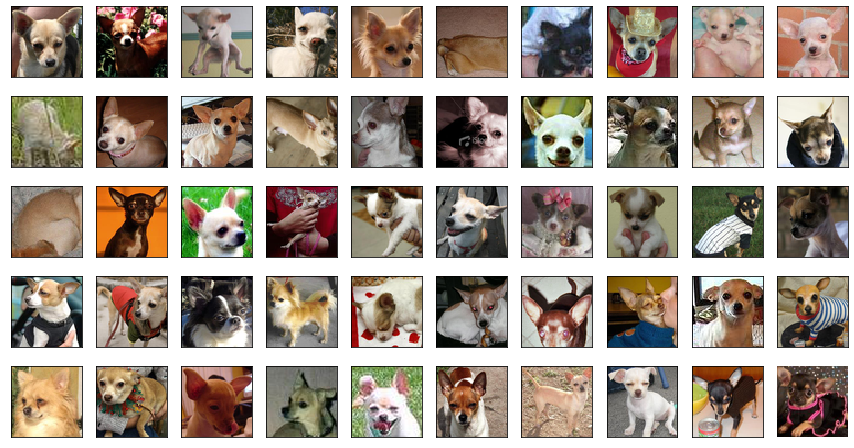

In [5]:
fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for image, ax in zip(all_images, axes.ravel()):
    bbox=bounding_box(image)
    im=Image.open(os.path.join(root_images,image))
    im=im.crop(bbox)
    im = im.resize((64,64), Image.LANCZOS)
#     print(im.size)
    plt.axis("off")
    ax.imshow(im)

In [67]:
for image in all_images:
    bbox=bounding_box(image)
    im=Image.open(os.path.join(root_images,image))
    im=im.crop(bbox)
    im = im.resize((64,64), Image.LANCZOS)
    savepath = "../input/all-dogs-crop3/pics/" + image
    im.save(savepath,"PNG")